In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

from copy import copy
from pathlib import Path

from My_libraries.my_stats import half_frame


# Histograms, frequency plots and so on

It is often said that one picture is worth a thousand words. This is particularly true where data is concerned. Listing all data values is typically totally useless and typical descriptive statistics are truly not that much better as soon as **the data no longer have a central tendency**.

Consider the following cases:

1. Jeff Bezos (evilness)

2. Elon Musk (stupidity)

2. Harry Potter (sales)

3. Earthquakes (energy)

4. Fires (area)

5. Population of countries (people)



In [22]:
n = 100
samples = []
samples.append( stats.poisson.rvs(3, size = n) )

samples.append( list(stats.poisson.rvs(1., size = int(n/2))) )
samples[-1].extend(list(stats.poisson.rvs(5., size = n - int(n/2))))

samples.append( stats.uniform.rvs(0, 6, size = n) )

samples.append( list(stats.poisson.rvs(2., size = int(n/2))) )
samples[-1].extend(list(stats.poisson.rvs(4., size = n - int(n/2))))

In [23]:
my_stats = [np.mean, np.median, np.std, stats.skew, stats.kurtosis]
stat_names = ['mean', 'median', 'standard deviation', 'skewness', 'kurtosis']

j = 4
for i, sample in enumerate(samples):
    print(f"The {stat_names[j]} of sample_{i+1} is {my_stats[j](sample): .2f}\n")


The kurtosis of sample_1 is -0.72

The kurtosis of sample_2 is -0.72

The kurtosis of sample_3 is -1.09

The kurtosis of sample_4 is  0.23



# Steps for creating a histogram

## Determine the dimensionality of your data

If the dimensionality is 1 then you are fine. If the dimensionality is 2, you may still be able to create a useful histogram if you have enough data. For all other cases, you can only plot the marginal distributions.

## Determine data type and support

**What is the type of your data?** Categorical? Integer? Continuous?

**What is the support of your data?** Is it all integers greater than 0? All real numbers in [0, 1]? A list of color names?

**If your data is continuous**, you will have to define bins for counting the number of events. Next, implement the following steps:

1.	Calculate the sample mean and sample standard deviation.
2.	If most of the data falls within a few standard deviations from the mean, then you can define your bins to be equal sized and with a width that will depend in a linear fashion with the sample size and the sample standard deviation.
3.	If that is not the case, then the size of your bins should follow a geometric series.

**If your data is categorical or integer**, then the way to proceed depends on the number of distinct values.  If the number is large, then you will also have to define bins for counting number of events. In this case, the bins will be contiguous ranges of integer values or groups of categories (‘European’ for ‘Austrian, ‘Belgian’ and so on, ‘African’ for ‘Algerian’, ‘Beninese’ and so on). If the number is relatively small, then each distinct value goes into your list of possible values.

## Determine frequency counts

Calculate the number of data points equal to a certain value or falling inside a given bin.

## Normalize the frequency counts 

To obtain a histogram, that is, an estimate of the probability of obtaining a given value for a data point drawn from the same distribution, you divide the frequency count by the product of the sample size and the number of values included in the bin.  
For integer or categorical data, the number of values in a bin is just a count of how many values are in the bin.
For continuous data, the number of values is the size of the bin. For example, if you divide the interval [0, 1] into ten bins, {[0, 0.1), [0.1, 0.2), …}, then the size of each bin is 0.1.

<img src = 'wh_economic_growth.png'>

## An example

Enter sample size:10
Enter eye color:green
Enter eye color:hazel
Enter eye color:dark brown
Enter eye color:green
Enter eye color:hazel
Enter eye color:brown
Enter eye color:dark brown
Enter eye color:blue
Enter eye color:dark brown
Enter eye color:dark brown
['Green', 'Hazel', 'Dark brown', 'Green', 'Hazel', 'Brown', 'Dark brown', 'Blue', 'Dark brown', 'Dark brown']


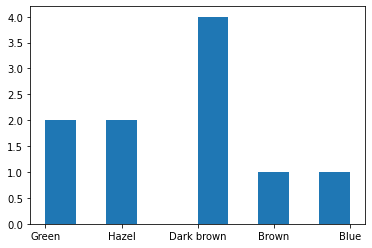

In [19]:
# Repeat 10 times:
# Ask for input of an eye color
#
# Collect all values and plot a frquency plot of the responses 
#
# Always useful to think first of all the variablews you are going to need
answers = []
n = int( input('Enter sample size:') )

for i in range(n):
    color = input('Enter eye color:')
    answers.append(color.capitalize())

print(answers)
plt.hist(answers)

plt.show()

In [6]:
# 1. All samples considered earlier are 1-dimensional, so we are fine
# 2. The data is continuous in one case but integer in the other cases
# 3. Let us determine the support of each sample

for i, sample in enumerate(samples):
    print(f"The minimum of sample_{i+1} is {min(sample): .2f} and the maximum is {max(sample): .2f}\n"
          f"The mean is {np.mean(sample): .2f} and the support is {(max(sample)-min(sample)/np.std(sample)): .2f}X "
          f"the standard deviation.\n" )


The minimum of sample_1 is  0.00 and the maximum is  9.00
The mean is  3.02 and the support is  9.00X the standard deviation.

The minimum of sample_2 is  0.00 and the maximum is  10.00
The mean is  3.04 and the support is  10.00X the standard deviation.

The minimum of sample_3 is  0.12 and the maximum is  5.97
The mean is  3.02 and the support is  5.89X the standard deviation.

The minimum of sample_4 is  0.00 and the maximum is  8.00
The mean is  2.81 and the support is  8.00X the standard deviation.



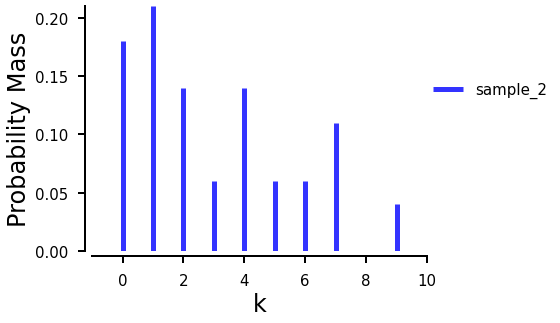

In [28]:
# So, in all cases the support is not too large when compared to the standard deviation
#
#
# 5B. Every value is added to list

colors = ['red', 'blue', 'orange', 'green']

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "k", "Probability Mass", font_size = my_font_size)

j = 1
sample = samples[j]
if type(sample[0]) in [np.int64, np.int32, int]:
    k_min = min(sample)
    k_max = max(sample)
    k_range = range(k_min, k_max + 1)

    hist = [0] * len(k_range)
    for k in sample:
        hist[k-k_min] += 1

    hist = np.array(hist) / len(sample)
    k_range = np.array(k_range)
    
    # Calculate and plot histogram
    ax.vlines( k_range, 0, hist, color = colors[j], linewidth = 5, alpha = 0.8, 
               label = f"sample_{j+1}")

# Format legend
ax.legend(loc = (1.0, 0.6), frameon = False, markerscale = 1.8, fontsize = my_font_size)

ax.set_xlim(k_min-1, k_max+1)
ax.set_ylim(0, max(hist))


plt.show()


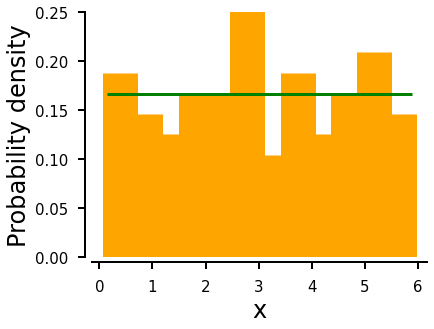

In [31]:
# 5A. The data is continuous

sample = samples[2]
x_min = min(sample)
x_max = max(sample)

n_bins = int((x_max - x_min) / np.std(sample) * np.sqrt(len(sample))/4)
# n_bins = 12

bin_width = (x_max - x_min) / n_bins

x_range = np.arange(x_min, x_max, bin_width)

hist = [0]*n_bins
for x in sample:
    if x < x_max:
        k = int((x - x_min) / bin_width)
        hist[k] += 1
        
hist = np.array(hist) / bin_width / len(sample)


fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "x", "Probability density", font_size = my_font_size)

ax.vlines(x_range+bin_width/2, 0, hist, color = colors[2], lw = 35)
ax.hlines(1./6., x_min, x_max, color = 'green', lw = 3)
ax.set_ylim(0, 0.25)

plt.show()


## When the support is too large

Let us now consider the creation of a histogram for data that spans a very broad range of scales, for example, from 0.001 to 1000. In such as situation, using bins that are equally sized will not produce an informative histogram.  Either your bins are very small and there are too many of them so there will be no data points for most of them, or you bins are very big and almost all data points will fall in the first bin.

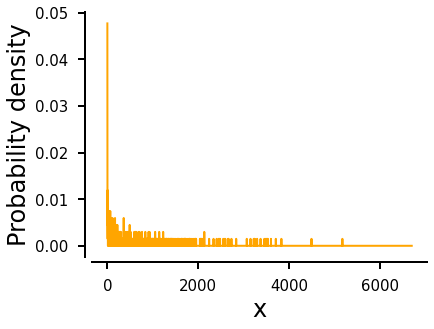

In [33]:
alpha, location, beta = 0.5, 0., 1000
sample = stats.gamma.rvs(alpha, location, beta, size = 1000)

x_min = min(sample)
x_max = max(sample)
# n_bins = 10 # Few bins
n_bins = 10000 # Lots of bins

bin_width = (x_max - x_min) / n_bins
x_range = np.arange(x_min, x_max, bin_width)

hist = [0]*n_bins
for x in sample:
    if x < x_max:
        k = int((x - x_min) / bin_width)
        hist[k] += 1
        
hist = np.array(hist) / bin_width / len(sample)


fig = plt.figure( figsize = (6, 4.5) )
sub1 = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(sub1, "x", "Probability density", font_size = my_font_size)

sub1.plot(x_range+bin_width/2, hist, color = colors[2], lw = 2)

plt.show()


The solution to this problem is to define bins whose size increases as a geometric series: 

> $size\_bin_i = size\_bin_{i-1} * b ~~~~~ \to ~~~~~size\_bin_i = b^i$

where $b \ge 1$.

# More fun with histograms

First, let's check that we have the data:

In [ ]:
data_folder = Path.cwd() / '..' / 'Data'

print(data_folder.exists())
print()
print(data_folder)
print()

for file_path in data_folder.glob('*.csv'): 
    print( file_path )

## Read data and plot frequency plot

In [ ]:
file_path = data_folder / 'individual_physical_attributes.csv'
with open(file_path, 'r') as file_in:
    df = pd.read_csv(file_in)
    
heights = list( copy(df.Height) )
n = 10
print(f"Print first {n} values of data:\n\t{heights[:n]}\n")

h_min = min(heights)
h_max = max(heights)
print(f"We have {len(heights)} data points. The maximum is {h_max} and the minimum is {h_min}." )


In [ ]:
195/12

oh, oh. What should we do?

### Set number of bins or bin width

In [ ]:
if type(heights[0]) == int:
    delta = 3
    n_bins = (h_max - h_min) / delta
    n_bins = int(n_bins) + 1
    print(f"Using {n_bins} bins with width {delta}.")

else:
    n_bins = 10
    delta = (h_max - h_min) / n_bins
    print(f"Using {n_bins} bins with width {delta}.")


### Calculate frequencies

In [ ]:
frequencies = [0] * n_bins
boundaries = [h_min + delta]
for i in range(n_bins):
    boundaries.append(boundaries[-1] + delta)

print(f"Defined {len(boundaries)} bin boundaries and placed them at\n{boundaries}.\n")

for h in heights[:]:
    k = 0
    while h > boundaries[k]:
        k += 1
    
    frequencies[k] += 1
#     print(h, k)

# Test we included all data points
assert(sum(frequencies) == len(heights))

print(f"The measured frequencies are:\n{frequencies}.")

### Make frequency plot

In [ ]:
fig = plt.figure( figsize = (12, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "height", "Frequency", font_size = my_font_size)

xticks = [h_min]
xticks.extend(boundaries)
x_values = np.array(boundaries[:-1]) - (delta/2. + 0.5)

ax.plot(x_values, frequencies, 'o-', lw = 2)
ax.set_xticks(xticks)

# print(xticks)
# print(x_values)

plt.show()


### Plot histogram

In [ ]:
fig = plt.figure( figsize = (12, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "height", "Probability density", font_size = my_font_size)

pdf = np.array(frequencies) / len(heights) / delta

ax.plot(x_values, pdf, 'o-', lw = 2)
ax.set_xticks(xticks) 

plt.show()


In [ ]:
# Cumulative distribution and the survival function
#

flag = 'sf'
# flag = 'cd'
y_label = {'sf': 'Survival function', 'cd': 'Cumulative distribution'}
my_color = {'sf': 'r', 'cd': 'b'}

cumulative = [0]
x_values = list( range(h_min, h_max + 1) )
for h in x_values:
    cumulative.append( cumulative[-1] + heights.count(h))
    
x_values.insert(0, h_min - 1)
# print(x_values)
# print(cumulative)

if flag == 'sf':
    my_array = 1. - np.array(cumulative) / len(heights)
elif flag == 'cd':
    my_array = np.array(cumulative) / len(heights)

fig = plt.figure( figsize = (6, 4.5) )
ax = fig.add_subplot(1,1,1)
my_font_size = 15
half_frame(ax, "height", y_label[flag], font_size = my_font_size)

ax.plot(x_values, my_array, 'o-', color = my_color[flag], lw = 2)

plt.show()


In [ ]:
print(my_array[-1])